# Product Demand Forecasting

## 1.Data Preprocessing

### Import necessary loibraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [3]:
df = pd.read_csv("Product Demand Forecasting.csv")

### EDA(Exploratory Data Analysis)

In [4]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [5]:
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [6]:
# Shape of the data set 
df.shape

(1048575, 5)

In [7]:
# Columns in the dataset
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [8]:
# General description about the columns on the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [9]:
# Null values in the data set 
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

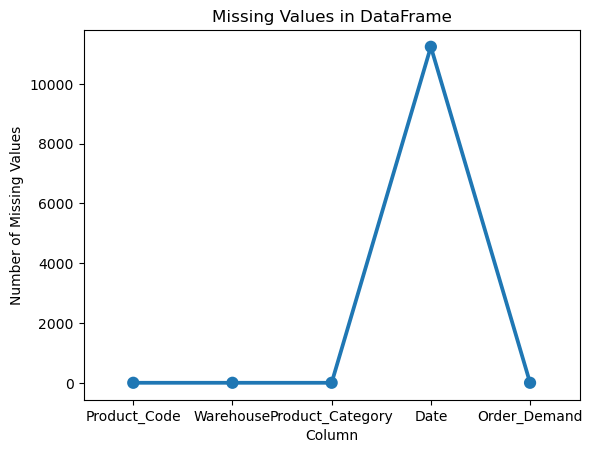

In [10]:
# Visulaize the null values using point plot
#df = pd.DataFrame(df)
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Create a point plot for the missing values
sns.pointplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values in DataFrame')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.show()

- Clearly we could only column with null values is date feature . AS deleted rows might lead to loose of certain data we fill them 

In [11]:
#Calculate null value percentage 
null_percentage = df.isnull().sum()/ len(df)
null_percentage

Product_Code        0.000000
Warehouse           0.000000
Product_Category    0.000000
Date                0.010718
Order_Demand        0.000000
dtype: float64

In [12]:
# Check for duplicated rows in the column
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570     True
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

**There might be chnace of loosing some important data upon removing duplicated rows. So for best use leave them as it ease**

In [13]:
# Dtypes of the columns 
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

**Clearly all the columns are of object type(categorical). So need further investigation and covert it into resepctive data type**

### Convertion of data types of Particular Columns for better understanding

**Convert the datatype of `Order_Demand` column to INT**

In [14]:
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce').astype(pd.Int64Dtype())

 the errors parameter specifies how to handle errors during the conversion of values to numeric type. When errors='coerce' is specified, it means that any values that cannot be converted to numeric type will be replaced with NaN

In [15]:
df['Order_Demand'].dtype

Int64Dtype()

<AxesSubplot:>

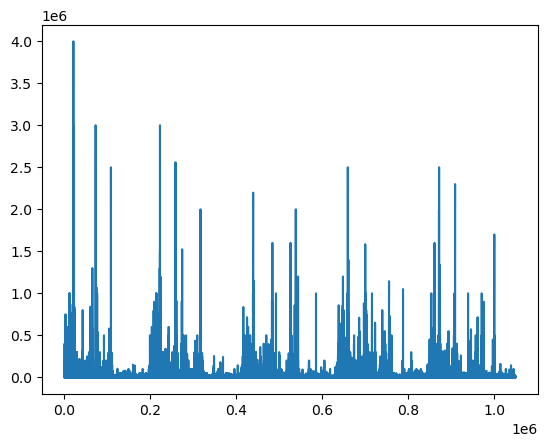

In [16]:
# Graphical Representation of 'Order_Demand' column
df['Order_Demand'].plot()

In [17]:
# Check for error values again 
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand        10469
dtype: int64

- The count of null values increased in Order_demand column as there were few values which cannot be converted to int type)

In [18]:
# Statistic Summary of Numerical Columns
# T- is used to show the trasnpose 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_Demand,1038106.0,4936.488009,29024.624092,0.0,20.0,300.0,2000.0,4000000.0


**Converting the datatype of `Date` column to DateTime**

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50


In [20]:
# Sort the entries in the dataset accd to date
df = df.sort_values(by='Date')
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
...,...,...,...,...,...
995790,Product_1464,Whse_A,Category_019,NaT,<NA>
995791,Product_1541,Whse_A,Category_019,NaT,<NA>
995792,Product_1388,Whse_A,Category_019,NaT,<NA>
995793,Product_1541,Whse_A,Category_019,NaT,<NA>


In [21]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 Int64
dtype: object

In [22]:
# Overvoiew of data after above changes 
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_Demand,1038106.0,4936.488009,29024.624092,0.0,20.0,300.0,2000.0,4000000.0


### Concentrating only on Date and Order_Demand Column

In [24]:
df = df[['Date','Order_Demand']]
df

,Date,Order_Demand
44799,2011-01-08,2
72252,2011-05-31,108
8431,2011-06-24,85000
8432,2011-06-24,7000
72669,2011-09-02,1250
...,...,...
995790,NaT,<NA>
995791,NaT,<NA>
995792,NaT,<NA>
995793,NaT,<NA>


In [25]:
# An instance of df is saved in df1 storing for future use
df1 = df.copy()
# Set 'date' column as index
df1 = df1.set_index('Date')
df1

,Order_Demand
Date,
2011-01-08,2
2011-05-31,108
2011-06-24,85000
2011-06-24,7000
2011-09-02,1250
...,...
NaT,<NA>
NaT,<NA>
NaT,<NA>


In [26]:
df1.isnull().sum()

Order_Demand    10469
dtype: int64

In [27]:
df.isnull().sum()

Date            11239
Order_Demand    10469
dtype: int64

In [28]:
# Forward filling the nulll values 
df.ffill(inplace=True)

- We took ffill beacasue using mean/ median/mode would be innaprpriate in this case 

In [29]:
df.isnull().sum()

Date            0
Order_Demand    0
dtype: int64

In [30]:
df[:50]

,Date,Order_Demand
44799,2011-01-08,2
72252,2011-05-31,108
8431,2011-06-24,85000
8432,2011-06-24,7000
72669,2011-09-02,1250
17249,2011-09-27,5
17250,2011-09-27,23
74615,2011-09-30,5450
131426,2011-10-20,5450
131429,2011-10-20,5450


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_Demand,1048575.0,4914.591529,28919.163057,0.0,20.0,300.0,2000.0,4000000.0


### Understanding the data 

In [32]:
#df.dtypes

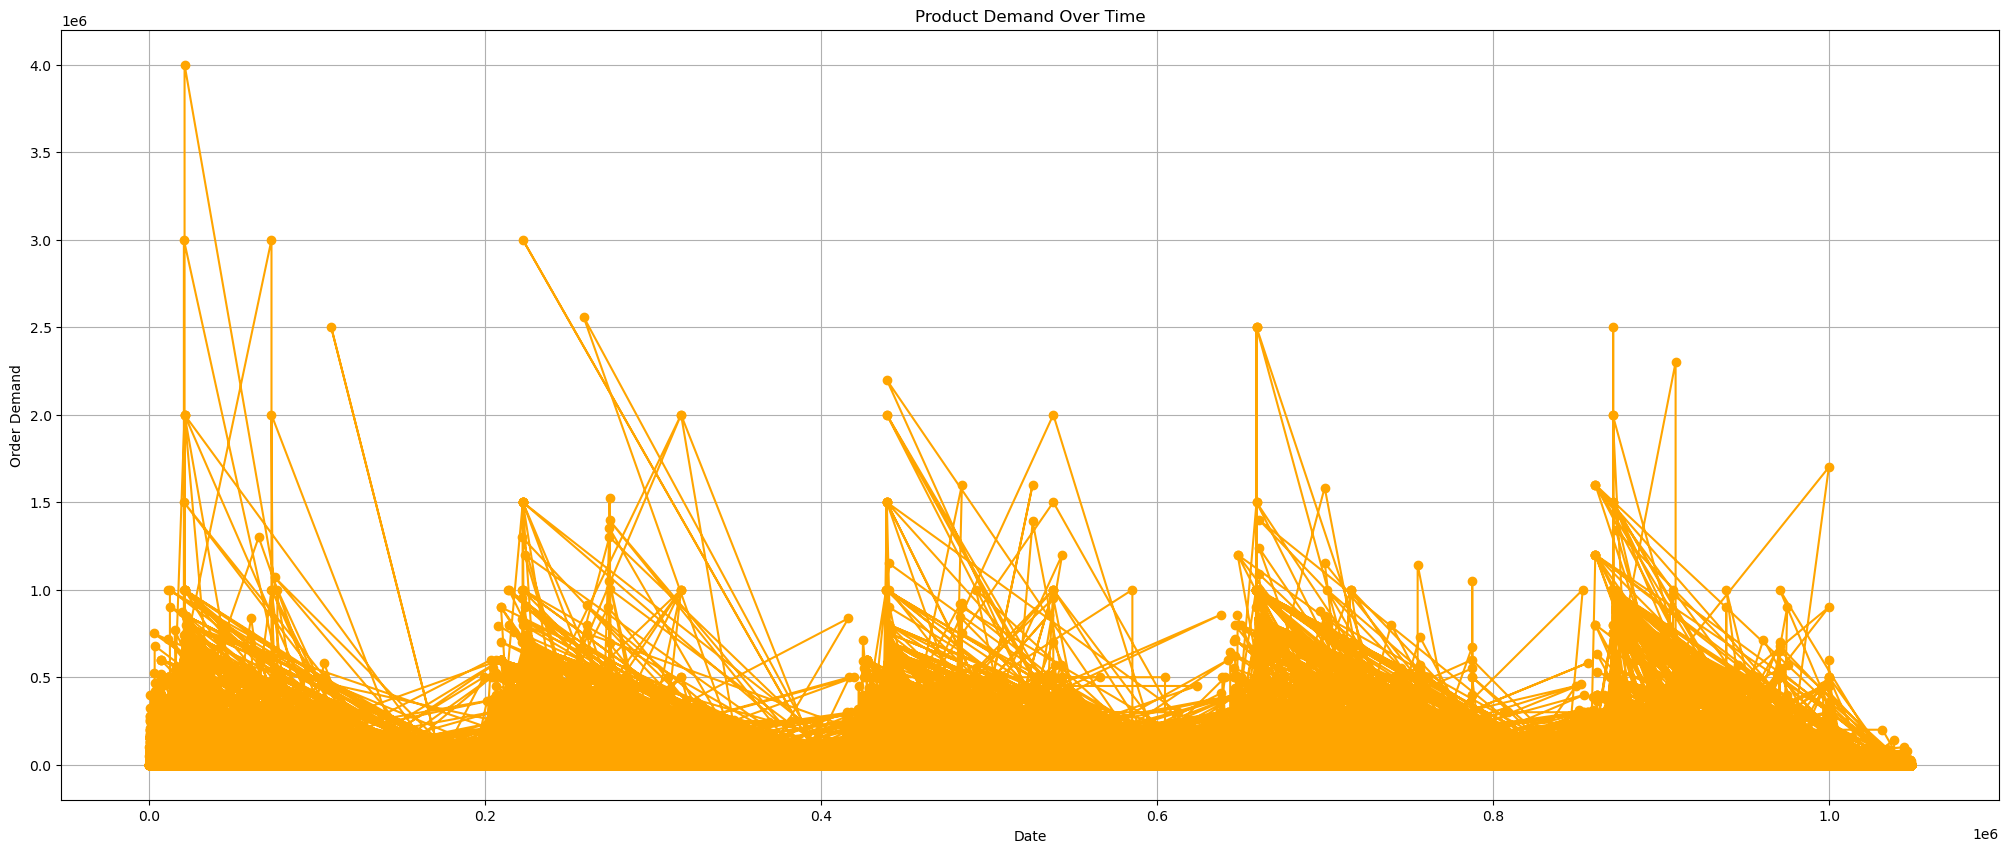

In [33]:

# Visualize demand trends
plt.figure(figsize=(25, 10))
plt.plot(df.index, df['Order_Demand'], marker='o', linestyle='-',color='orange')
plt.title('Product Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.grid(True)
plt.show()


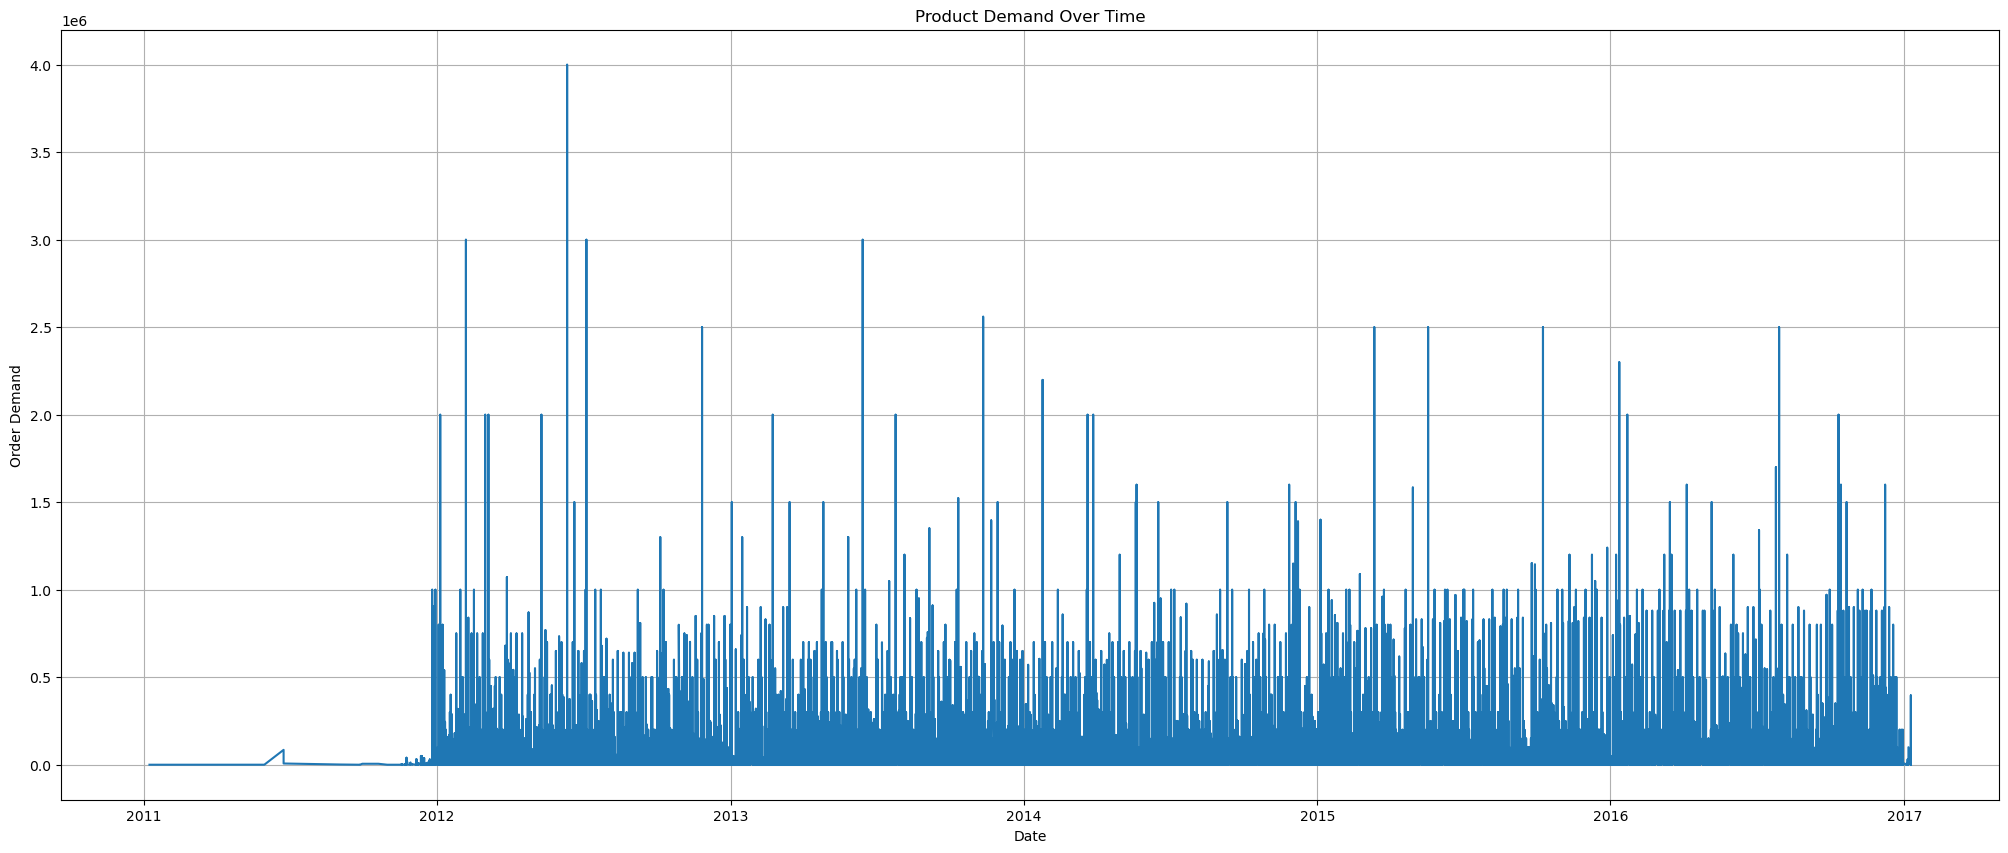

In [34]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing date and Order_Demand columns

plt.figure(figsize=(25, 10))

# Plot Order_Demand over Date 
plt.plot(df['Date'], df['Order_Demand'], linestyle='-')

# Add labels and title
plt.title('Product Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.grid(True)

# Show plot
plt.show()


In [35]:
df.head()

,Date,Order_Demand
44799,2011-01-08,2
72252,2011-05-31,108
8431,2011-06-24,85000
8432,2011-06-24,7000
72669,2011-09-02,1250


In [36]:
df

,Date,Order_Demand
44799,2011-01-08,2
72252,2011-05-31,108
8431,2011-06-24,85000
8432,2011-06-24,7000
72669,2011-09-02,1250
...,...,...
995790,2017-01-09,40
995791,2017-01-09,40
995792,2017-01-09,40
995793,2017-01-09,40


**Sales Distribution**

    Sales_dist used for Checking Sales Distribution.
    data used : DataFrame containing sales data
  

In [37]:
sales_df = df.copy(deep=True)

min_demand = sales_df['Order_Demand'].min()
max_demand = sales_df['Order_Demand'].max()
avg_demand = sales_df['Order_Demand'].mean()

bin_edges = [min_demand,avg_demand, 10000, 15000,20000, max_demand]
bin_edges.sort()

sales_df['sales_bins'] = pd.cut(sales_df.Order_Demand, bins = bin_edges)

print('Max sale:', max_demand)
print('Min sale:', min_demand)
print('Avg sale:', avg_demand)




Max sale: 4000000
Min sale: 0
Avg sale: 4914.591529456644


In [38]:
# Total number of data points
total_points = sales_df['sales_bins'].count()
print('Order_Demand bucket v/s Total percentage:')
display((sales_df['sales_bins'].value_counts() / total_points) * 100)

Order_Demand bucket v/s Total percentage:


(0.0, 4914.592]         82.215767
(4914.592, 10000.0]     10.452345
(20000.0, 4000000.0]     4.313604
(15000.0, 20000.0]       2.037831
(10000.0, 15000.0]       0.980454
Name: sales_bins, dtype: float64

In [39]:
sales_df['sales_bins'].describe()

count             1017896
unique                  5
top       (0.0, 4914.592]
freq               836871
Name: sales_bins, dtype: object

In [40]:
total_points

1017896

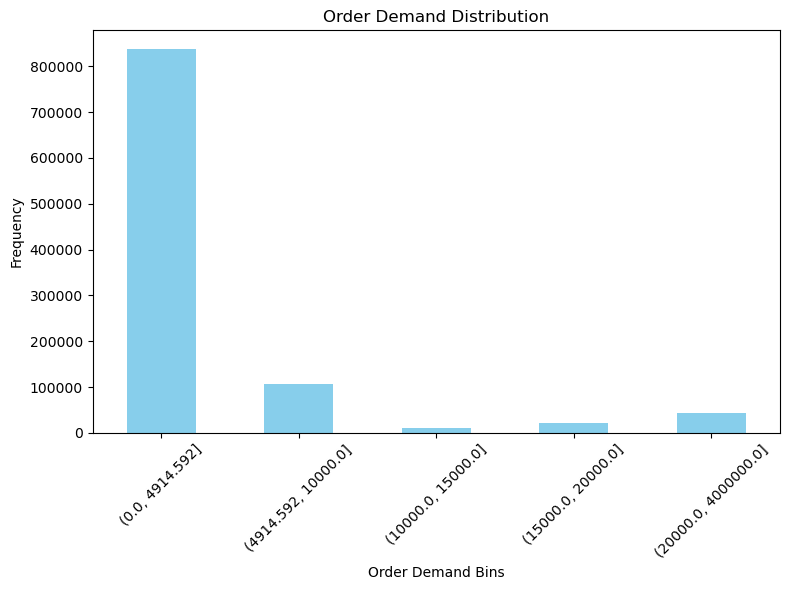

In [41]:
# Assuming sales_df is the DataFrame with 'Order_Demand' bins
sales_bins_count = sales_df['sales_bins'].value_counts()

plt.figure(figsize=(8, 6))
sales_bins_count.sort_index().plot(kind='bar', color='skyblue')
plt.title('Order Demand Distribution')
plt.xlabel('Order Demand Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Data Preparation

Sorting the date column in ascending order 

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

Aggregating the Order_Demand Column by date for better alanysing 

In [43]:
# Aggregating order demand by date
df = df.groupby('Date')['Order_Demand'].sum().reset_index()
df

,Date,Order_Demand
0,2011-01-08,2
1,2011-05-31,108
2,2011-06-24,92000
3,2011-09-02,1250
4,2011-09-27,28
...,...,...
1724,2017-01-03,2400
1725,2017-01-04,29250
1726,2017-01-05,83929
1727,2017-01-06,175140


In [44]:
df.shape

(1729, 2)

# Model Train

## Long Short-Term Memory(LSTM) 


- LSTM (Long Short-Term Memory) is a specialized recurrent neural network (RNN) architecture widely employed in deep learning for tasks involving sequential data. It excels in capturing long-term dependencies, making it indispensable for various applications like time series forecasting, natural language processing, speech recognition, and gesture recognition. Unlike traditional RNNs, LSTM addresses the vanishing gradient problem, allowing it to effectively learn from sequences of data over extended time periods. Its ability to retain memory of past information enables accurate predictions and classifications, making it a versatile tool in the realm of artificial intelligence.

- In essence, LSTM serves as a fundamental building block in modern deep learning, offering powerful capabilities for modeling complex sequences and understanding intricate patterns within them. Its versatility and robustness have led to widespread adoption across diverse domains, where it plays a crucial role in advancing technologies such as predictive analytics, language understanding, and human-computer interaction.

- LSTM (Long Short-Term Memory) neural networks play a key role in product demand forecasting by capturing sequential dependencies and patterns in time-series data, enabling accurate predictions of future demand fluctuations.

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the Order_Demand
scaler = MinMaxScaler(feature_range=(0, 1))
df['Order_Demand'] = scaler.fit_transform(np.array(df['Order_Demand']).reshape(-1, 1))

In [46]:
#import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [47]:
# Ensuring data is cleaned before proceeding
df = df 
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Handle any missing values
df['Order_Demand'].fillna(method='ffill', inplace=True)


### Split the data df into train and test datasets

In [48]:
#df_train, df_test = train_test_split(df, test_size=0.33, shuffle=False)


shuffle is false , because we are working on a time series so if the data is shuffled training wouldnt be dne properly and we may not get proper results 


### Rescale/Normalize the data

In [49]:
# Normalize the Order_Demand
scaler = MinMaxScaler(feature_range=(0, 1))
df['Order_Demand'] = scaler.fit_transform(df['Order_Demand'].values.reshape(-1, 1))


# Normalize the Order_Demand
#scaler = MinMaxScaler(feature_range=(0, 1))
#df_train_scaled = scaler.fit_transform(df_train['Order_Demand'].values.reshape(-1, 1))
#df_test_scaled = scaler.transform(df_test['Order_Demand'].values.reshape(-1, 1))
#df_test.shape

In [50]:
# Function to create sequences for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]
        X.append(a)
        Y.append(dataset[i + time_step])
    return np.array(X), np.array(Y)


This function create_dataset is used to prepare the input-output pairs for training an LSTM model. It creates sequences of input data (X) and corresponding output data (Y) by sliding a window of fixed size (time_step) over the dataset. This sliding window approach allows the LSTM model to learn patterns and relationships in the sequential data.

this function helps in organizing the data into input-output pairs suitable for training an LSTM model, enabling it to learn from the sequential nature of the data.

In [51]:
# Splitting dataset into train and test
time_step = 100
X, y = create_dataset(df['Order_Demand'], time_step)
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]


#time_step = 100
#X_train, y_train = create_dataset(df_train_scaled, time_step)
#X_test, y_test = create_dataset(df_test_scaled, time_step)
#X_test.shape

In [52]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Reshape input to be [samples, time steps, features]
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

 The reason for reshaping is to ensure that the input data has the correct dimensions expected by the LSTM model.
 
In the context of LSTM models, the input data should be reshaped into a 3D array with the shape [samples, time steps, features], where:

samples refers to the number of data points or samples in the dataset.
time steps refers to the number of time steps or historical data points included in each input sequence.
features refers to the number of features or variables in each data point. 

After splitting the dataset and creating the input sequences using the create_dataset function, the input data (X_train and X_test) are reshaped to match this 3D array format. This ensures that the LSTM model can correctly interpret and process the input data during training and prediction.

In [53]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [54]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100

18/18 [==============================] - 13s 291ms/step - loss: 0.0535 - val_loss: 0.0408
Epoch 2/100
18/18 [==============================] - 3s 163ms/step - loss: 0.0430 - val_loss: 0.0401
Epoch 3/100
18/18 [==============================] - 3s 163ms/step - loss: 0.0424 - val_loss: 0.0400
Epoch 4/100
18/18 [==============================] - 3s 150ms/step - loss: 0.0419 - val_loss: 0.0391
Epoch 5/100
18/18 [==============================] - 3s 141ms/step - loss: 0.0422 - val_loss: 0.0390
Epoch 6/100
18/18 [==============================] - 3s 148ms/step - loss: 0.0414 - val_loss: 0.0397
Epoch 7/100
18/18 [==============================] - 2s 139ms/step - loss: 0.0414 - val_loss: 0.0393
Epoch 8/100
18/18 [==============================] - 3s 158ms/step - loss: 0.0422 - val_loss: 0.0394
Epoch 9/100
18/18 [==============================] - 3s 172ms/step - loss: 0.0416 - val_loss: 0.0392
Epoch 10/100
18/18 [==============================] - 3s 166ms/step - loss: 0.0412 - val_

18/18 [==============================] - 3s 174ms/step - loss: 0.0266 - val_loss: 0.0368
Epoch 80/100
18/18 [==============================] - 3s 168ms/step - loss: 0.0250 - val_loss: 0.0384
Epoch 81/100
18/18 [==============================] - 3s 173ms/step - loss: 0.0244 - val_loss: 0.0397
Epoch 82/100
18/18 [==============================] - 3s 174ms/step - loss: 0.0262 - val_loss: 0.0375
Epoch 83/100
18/18 [==============================] - 3s 176ms/step - loss: 0.0261 - val_loss: 0.0383
Epoch 84/100
18/18 [==============================] - 3s 173ms/step - loss: 0.0245 - val_loss: 0.0388
Epoch 85/100
18/18 [==============================] - 3s 174ms/step - loss: 0.0241 - val_loss: 0.0399
Epoch 86/100
18/18 [==============================] - 3s 175ms/step - loss: 0.0236 - val_loss: 0.0364
Epoch 87/100
18/18 [==============================] - 3s 175ms/step - loss: 0.0243 - val_loss: 0.0368
Epoch 88/100
18/18 [==============================] - 3s 174ms/step - loss: 0.0237 - val_loss: 

- `epochs:` This parameter defines the number of epochs, i.e., the number of times the entire training dataset will be passed forward and backward through the neural network during training. One epoch consists of one forward pass and one backward pass of all the training examples.

- `verbose:` This parameter controls the verbosity of the training process. It determines the amount of information printed during training. A value of 1 (default) prints progress bars showing the training and validation metrics for each epoch, while 0 suppresses the output.

- `batch_size:`

This parameter determines the number of samples processed before the model is updated.
Reducing the batch size can lead to faster training times because the model updates more frequently, but it may also result in less stable updates and less accurate gradients.
Removing the batch size parameter entirely would default to using a batch size of 32 or the size of the training dataset if it's smaller. This could lead to slower training times and possibly less accurate models, especially for larger datasets.

In [55]:
# Predictions on train data 
y_train_pred = model.predict(X_train)

# Predictions on test data
y_test_pred = model.predict(X_test)



17/17 [==============================] - 1s 41ms/step


In [56]:
# Calculate RMSE performance metrics before Inverse_scaling
#y_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
#y_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

#print(y_train_rmse)
#print(y_test_rmse)

### Evaluating the model on train data set

In [57]:
from sklearn.metrics import r2_score, mean_squared_error



# Calculate Mean Squared Error (MSE)
y_train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
y_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate R2 score
y_train_r2 = r2_score(y_train, y_train_pred)


print("Mean Squared Error (MSE):", y_train_mse)
print("Root Mean Squared Error (RMSE):", y_train_rmse)
print("R2 Score:", y_train_r2)

Mean Squared Error (MSE): 0.023748271738941316
Root Mean Squared Error (RMSE): 0.15410474275291242
R2 Score: 0.4197892974224354


### Evaluating the model on test data set

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate Mean Squared Error (MSE) for the test set
y_test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE) for the test set
y_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R2 score for the test set
y_test_r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE) for test set:", y_test_mse)
print("Root Mean Squared Error (RMSE) for test set:", y_test_rmse)
#print("R2 Score for test set:", y_test_r2)


Mean Squared Error (MSE) for test set: 0.03936413137676448
Root Mean Squared Error (RMSE) for test set: 0.19840396008337252


In [59]:
# Inverse transform to get actual values
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

# Adjust the shape of y_train and y_test to match the predictions
y_train_reshaped = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_reshaped = scaler.inverse_transform(y_test.reshape(-1, 1))

- the scaled i/p may result in provided a scaled o/p but for quality puropses we inverse-scale the original data so that we can get appropriate results. 

- By applying scaler.inverse_transform(), we ensure that the predicted values are represented in the same units and scale as the original target variable, making them more interpretable and suitable for evaluation using metrics such as RMSE (Root Mean Squared Error) or visual inspection.

In [60]:
# Calculate RMSE performance metrics after Inverse_scaling
y_train_rmse = np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred))
y_test_rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred))

print(y_train_rmse) 
print(y_test_rmse) 

0.15410474275291242
0.19840396008337252


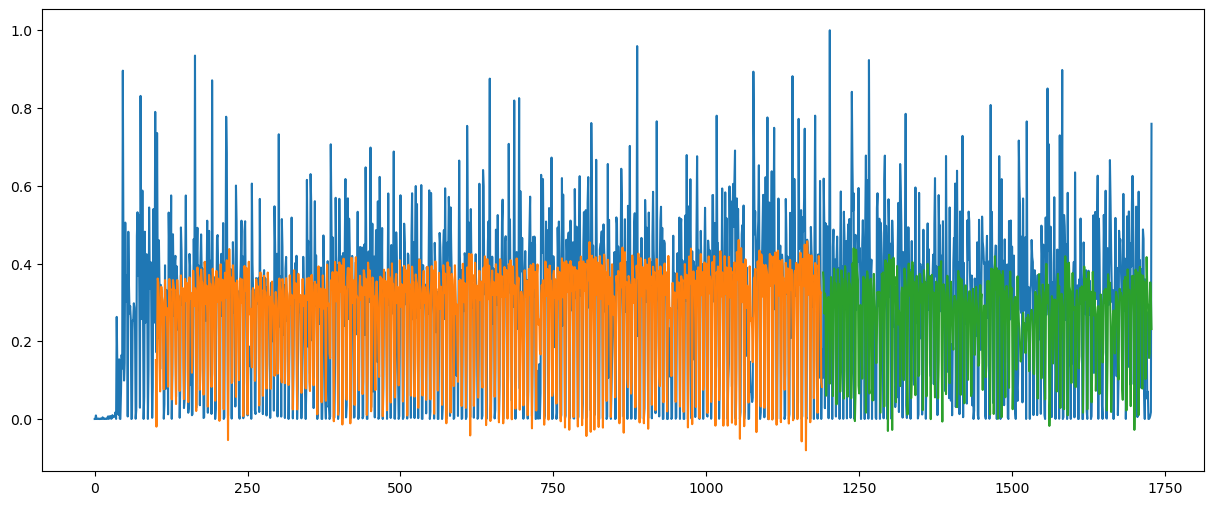

In [61]:
# Plotting
# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df['Order_Demand'])
trainPredictPlot[:] = np.nan
trainPredictLength = len(y_train_pred)
trainPredictPlot[look_back:look_back+trainPredictLength] = y_train_pred[:, 0]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df['Order_Demand'])
testPredictPlot[:] = np.nan
testPredictStart = look_back + trainPredictLength + 1
testPredictLength = len(y_test_pred)
testPredictPlot[testPredictStart:testPredictStart+testPredictLength] = y_test_pred[:, 0]

# Plot baseline and predictions
plt.figure(figsize=(15, 6))
plt.plot(df['Order_Demand'].reset_index(drop=True))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [62]:
# Plot baseline and predictions
#plt.figure(figsize=(15, 6))
#plt.plot(scaler.inverse_transform(df['Order_Demand'].values.reshape(-1,1)))
#plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
#plt.show()

#print("Train RMSE: ", y_train_rmse)
#print("Test RMSE: ", y_test_rmse)

- This graph visualizes model predictions alongside actual time series data. It creates arrays to hold predictions for both training and test datasets, aligning them correctly with the original data. By plotting all three lines on the same graph, it enables easy comparison between actual values and model predictions. The resulting plot aids in assessing the model's ability to capture data patterns and predict future values.

**Saving the LSTM model for inference**

In [63]:
from keras.models import load_model

# Save the model
model.save('lstm_model.h5')

In [64]:
# Load the saved model
model = load_model('lstm_model.h5')

### Forecating order demand for next 30days

In [65]:
# Normalize the Order_Demand
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df['Order_Demand'].values.reshape(-1, 1))

# Prepare the last part of the dataset to seed the prediction
time_step = 100
last_part = df_scaled[-time_step:]  # Last 'time_step' elements
X_input = last_part.reshape(1, -1, 1)


In [66]:
# Predict the next 30 days
predictions = []
for i in range(30):
    # Get the prediction
    y_pred = model.predict(X_input, verbose=0)
    
    # Append the prediction
    predictions.append(y_pred[0, 0])
    
    # Use the prediction as input for the next step
    # Reshape yhat to 3D array with dimensions matching X_input
    y_pred_reshaped = y_pred[0].reshape(1, 1, 1)
    X_input = np.concatenate((X_input[:, 1:, :], y_pred_reshaped), axis=1)

# Inverse transform predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


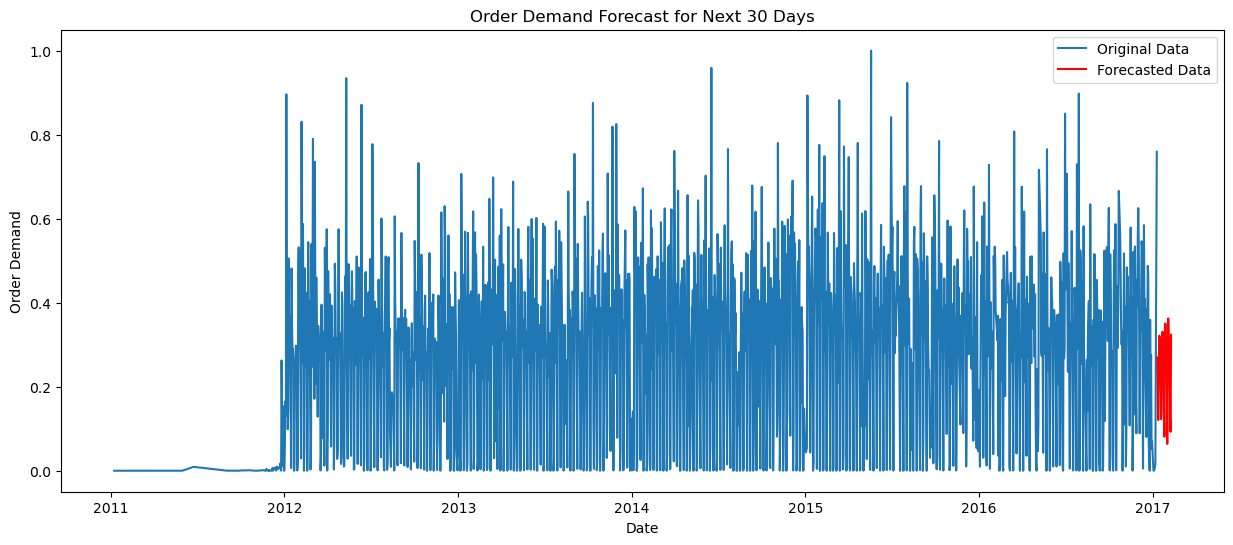

In [67]:
# Assuming df['Date'] and df['Order_Demand'] are your original data columns
# And assuming 'predictions' is a list/array containing your 30-day forecasts

# Calculate the start date for the predictions (the day after the last date in your dataset)
start_date = df['Date'].iloc[-1] + pd.Timedelta(days=1)

# Generate dates for the predictions
prediction_dates = pd.date_range(start=start_date, periods=len(predictions))

# Plot the original data
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Order_Demand'], label='Original Data')

# Plot the predictions
plt.plot(prediction_dates, predictions, color='red', label='Forecasted Data')

# Adding title and labels
plt.title('Order Demand Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()

# Show the plot
plt.show()


-  The code prepares the last part of a dataset to seed predictions, reshaping it to match the input shape expected by the model.
-  It iterates over 30 steps to forecast the next 30 days, predicting each value based on the input data and updating the input for the next prediction.
-  Predicted values are inverse-transformed to obtain the actual forecasted values in their original scale.
-  The original data and the forecasted values are plotted on the same graph, allowing for visual comparison and analysis of the predicted order demand for the next 30 days.

### Insights from LSTM Model

**Model Performance Evaluation:**

- The evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score provide an indication of how well the LSTM model is capturing the patterns in the 'Order_Demand' data.
- Lower values of MSE and RMSE indicate better model performance, as they represent the average squared difference between predicted and actual demand values. A higher R2 score indicates a better fit of the model to the data.

**Prediction Accuracy:**

- The plot of original 'Order_Demand' data along with LSTM model predictions visually compares the actual demand with the forecasted demand. This helps in assessing the accuracy of the model in predicting future demand trends.
- By analyzing the plot, stakeholders can gain insights into how well the LSTM model is capturing the variations and fluctuations in demand over time.

**Forecasting Future Demand:**

- The forecasted data for the next 30 days provides valuable insights for inventory planning and management. It helps stakeholders anticipate future demand trends and make informed decisions regarding production, procurement, and distribution of goods.
- By leveraging the LSTM model's predictions, businesses can optimize their supply chain operations, minimize stockouts or overstock situations, and ensure timely fulfillment of customer orders.

**Optimization Opportunities:**

- Analyzing the forecasted demand patterns can highlight opportunities for process optimization and resource allocation. For example, if the model predicts a surge in demand for certain products or during specific time periods, businesses can adjust their production schedules or marketing strategies accordingly to meet customer needs effectively.
- Additionally, insights from the LSTM model can guide decision-making related to inventory stocking levels, pricing strategies, and 

# ARIMA




**Since the data preprocessing is already done earlier , we are directly starting with model building**

- ARIMA(AutoRegressive Integrated Moving Average)  is a popular time series forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components to capture the temporal dependencies and patterns in time series data.
- It is a versatile and powerful model that can handle various types of time series data, including trends, seasonality, and irregularities.


- ARIMA models are widely used in product demand forecasting to predict future demand based on historical sales or demand data.

- By analyzing past demand patterns and incorporating information about trends, seasonality, and other factors, ARIMA models can generate accurate forecasts of future demand for products.

**Components of ARIMA:**

- Autoregressive (AR): Represents the relationship between a variable and its past values. It captures the linear dependency of the current value on its previous values.
- Integrated (I): Represents the differencing operation applied to make the time series stationary. It removes trends and seasonality from the data.
- Moving Average (MA): Represents the relationship between a variable and the residual errors from a moving average model. It captures the short-term fluctuations or noise in the data.




In [68]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
order = (5, 1, 0)  # Example order (p, d, q)
arima_model = ARIMA(df['Order_Demand'].values, order=order)
arima_result = arima_model.fit()



- Define and Fit the ARIMA Model:

 - `order = (5, 1, 0):` This specifies the order of the ARIMA model, denoted as (p, d, q). Here, (5, 1, 0) indicates that the model includes an autoregressive (AR) component of order 5, a differencing (I) component of order 1 (to make the data stationary), and no moving average (MA) component.
 - `arima_model = ARIMA(df['Order_Demand'].values, order=order):` This creates an ARIMA model object using the provided order and the time series data (in this case, the 'Order_Demand' values from the DataFrame df).
    - `arima_result = arima_model.fit():` This fits the ARIMA model to the data, estimating the parameters of the model based on the provided order and input time series.

In [69]:
# Predict using ARIMA
y_pred = arima_result.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, typ='levels')
y_pred

array([ 0.31119435,  0.40893887,  0.45028721,  0.43853629,  0.27808744,
        0.25727344,  0.28425127,  0.45504879,  0.458838  ,  0.43183812,
        0.53123336,  0.34203265,  0.19130981,  0.45538956,  0.41546061,
        0.29295737,  0.64137563,  0.24093124,  0.27979922,  0.30753969,
        0.36591204,  0.40976408,  0.43610168,  0.47536097,  0.29591646,
        0.16836928,  0.25385164,  0.46148084,  0.28961256,  0.39603083,
        0.38934769,  0.22208375,  0.22163939,  0.21693905,  0.52888292,
        0.35582603,  0.35183128,  0.4312403 ,  0.16989607,  0.24605625,
        0.27591704,  0.42080276,  0.3017769 ,  0.37421397,  0.24657279,
        0.17086727,  0.32656068,  0.3225223 ,  0.36631595,  0.35353254,
        0.35154559,  0.24637403,  0.34566608,  0.26358056,  0.41852618,
        0.36422437,  0.26796128,  0.66838253,  0.20116668,  0.1419018 ,
        0.34651129,  0.28723094,  0.45989434,  0.27162309,  0.48807601,
        0.25473263,  0.25745851,  0.4468259 ,  0.31294273,  0.47

- Predict Using ARIMA:

    
    This generates predictions using the fitted ARIMA model. The start and end parameters specify the indices of the time series for which predictions are required. In this case, predictions are made for the test dataset, starting from the index following the end of the training dataset. The typ='levels' argument specifies that the predictions should be in terms of the original data levels (i.e., without differencing).

Mean Squared Error: 0.05359871463045464
Root Mean Squared Error: 0.19840396008337252


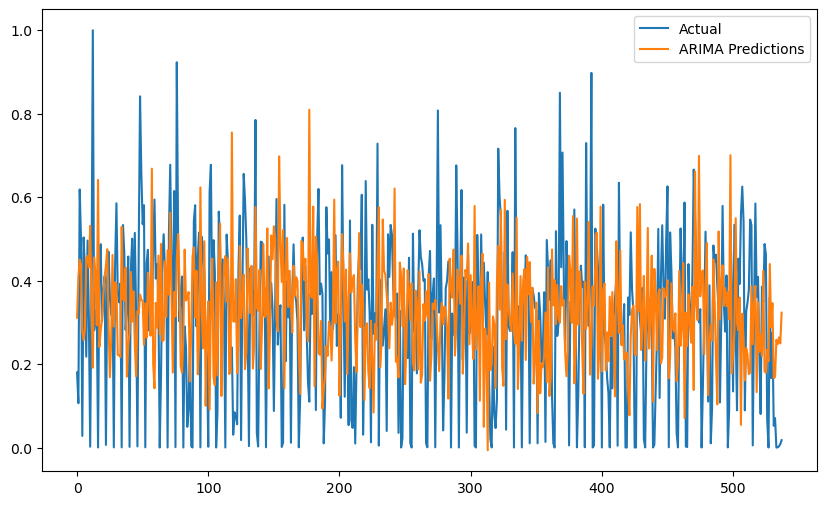

In [70]:
# Evaluate ARIMA using mean squared error
y_pred_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {y_pred_mse}')

y_pred_rmse = mean_squared_error(y_test, y_test_pred,squared=False)
print(f'Root Mean Squared Error: {y_pred_rmse}')

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='ARIMA Predictions')
plt.legend() #used for proving labels for each line 
plt.show()


- The calculated MSE value represents the average of the squared differences between the actual and predicted values. A lower MSE indicates better model performance, as it means that the predicted values are closer to the actual values.

### Saving Model for Inference

In [71]:
from joblib import dump

#model.save('arima_model.h5')


# Save the ARIMA model
dump(arima_result, 'arima_model.joblib')

# Load the ARIMA model
from joblib import load

In [72]:
# Load the saved ARIMA model
loaded_arima_model = load('arima_model.joblib')

### Forecasting product demand for next 30days

In [73]:
forecast_next_30_days = loaded_arima_model.forecast(steps=30)  # Forecasting the next 30 days
print(forecast_next_30_days)

[0.29638583 0.06638981 0.1374477  0.13690296 0.02677261 0.41037787
 0.34046098 0.14103522 0.16675349 0.20273249 0.09349825 0.25211513
 0.30511742 0.19018791 0.17529885 0.21999855 0.15251199 0.19601559
 0.26046863 0.21304512 0.18366852 0.21672274 0.18765656 0.18563896
 0.22859129 0.21877931 0.19254841 0.20976142 0.20323103 0.19060625]


- Forecasting: The forecast() function is called on the ARIMA model to generate predictions for future time steps. The steps parameter is set to 30, indicating that the model should forecast the next 30 days.

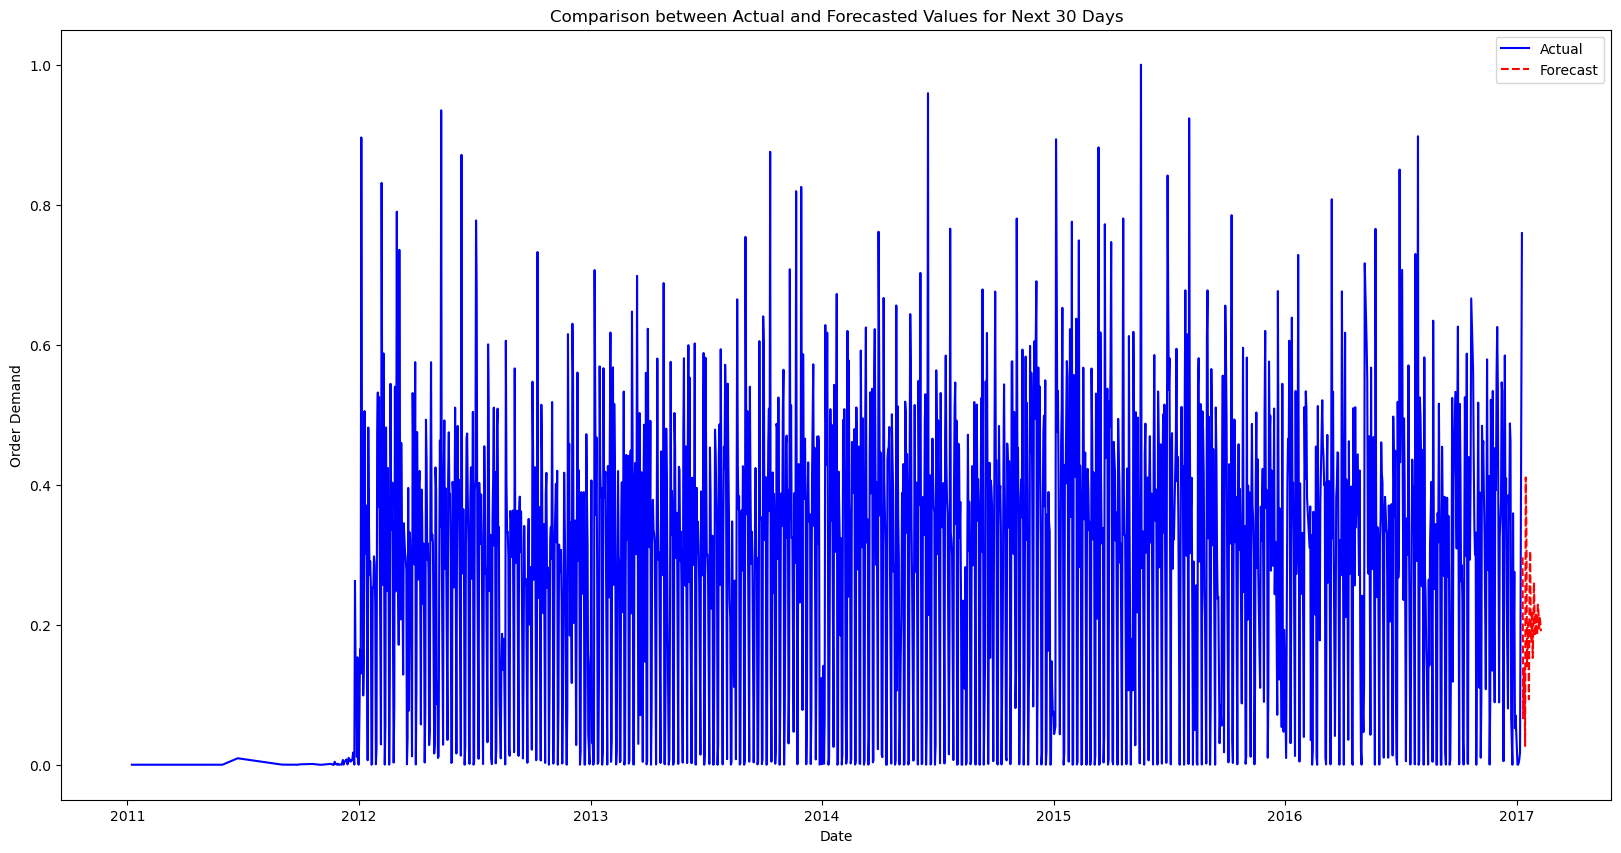

In [74]:
# Generate the timeline for the forecasted values
forecast_timeline = pd.date_range(start=df['Date'].iloc[-1], periods=31)[1:]  # Assuming df contains the date column

# Plotting the comparison graph
plt.figure(figsize=(20, 10))

# Plot actual demand values
plt.plot(df['Date'], df['Order_Demand'], label='Actual', color='blue')

# Plot forecasted values for the next 30 days
plt.plot(forecast_timeline, forecast_next_30_days, label='Forecast', linestyle='dashed', color='red')

plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Comparison between Actual and Forecasted Values for Next 30 Days')
plt.legend()
plt.show()


- The forecast_timeline variable is created using pd.date_range() to generate a timeline for the forecasted values. It starts from the last date in the df DataFrame and spans 31 days (including the current date). The [1:] slice is used to exclude the current date, assuming that the first date in the forecast is the day after the last date in the DataFrame.

- From the above graph , we could cleary see the difference b/w the actual data and forecasting data 

## Insights from ARIMA Model

- Intitially , we train the whole datset and predicted the results on test data set 

- The ARIMA model was fitted to the historical demand data, with an order of (5, 1, 0), indicating the autoregressive (AR) order, differencing (I) order, and moving average (MA) order.

- The ARIMA model was used to forecast the demand values for the next 30 days. The forecast_next_30_days variable contains the forecasted demand values.

- The mse value of  0.03 and rmse value of 0.019 - indicating the predictness and accuracy of our model

## SARIMA

**Since the data preprocessing is already done earlier , we are directly starting with model building**

- Seasonal Autoregressive Integrated Moving Average (SARIMA) is an extension of the ARIMA model that includes seasonality components to better capture periodic patterns in time series data.

-  SARIMA incorporates seasonal patterns into the model by introducing additional parameters to account for periodic fluctuations in the data, such as daily, weekly, or monthly seasonality.

-  Like ARIMA, SARIMA also involves differencing to make the time series stationary. This step helps remove trends and seasonality from the data to make it more amenable to modeling.

- SARIMA models are more flexible than basic ARIMA models as they can handle both non-seasonal and seasonal variations in the data. By considering seasonal factors, SARIMA can provide more accurate forecasts for time series with recurring patterns.

- In product demand forecasting, SARIMA can be particularly useful for capturing seasonal demand fluctuations, such as spikes in sales during holidays or specific seasons. By analyzing historical demand data and identifying seasonal patterns, SARIMA can generate forecasts that account for both short-term fluctuations and longer-term trends.

- ARIMA forecasts can inform decision-making processes related to inventory management, production planning, and resource allocation. By accurately predicting future demand, businesses can optimize their operations, minimize stockouts or overstocking, and meet customer demand more effectively.

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters (p, d, q) and seasonal parameters (P, D, Q, S)
order = (5, 1, 0)  
seasonal_order = (1, 1, 1, 12)  

# here in seasonal_order : S=12 indicated monthly seasonaloty 

- The parameters defined for the SARIMA model are as follows:

**Non-Seasonal Parameters (p, d, q):** 
        
    p (AR): The autoregressive (AR) order, representing the number of lag observations included in the model.
    d (I): The degree of differencing, indicating the number of times the data needs to be differenced to achieve stationarity.
    q (MA): The moving average (MA) order, indicating the size of the moving average window.
    
**Seasonal Parameters (P, D, Q, S):**

    P (AR): The seasonal autoregressive (SAR) order, representing the seasonal lag observations included in the model.
    D (I): The seasonal differencing, indicating the number of times the seasonal component is differenced to achieve stationarity.
    Q (MA): The seasonal moving average (SMA) order, indicating the size of the seasonal moving average window.
    S: The seasonal period, specifying the number of time steps in each seasonal cycle.    

In [76]:
# Fit the SARIMA model
sarima_model = SARIMAX(df['Order_Demand'].values, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

C:\Users\SHAIK JULFEEN AHMADH\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- SARIMA Model Initialization:

SARIMAX: This is the SARIMA model class from the statsmodels library.

The resulting sarima_result object contains information about the fitted model, including coefficients, residuals, and other diagnostic statistics.

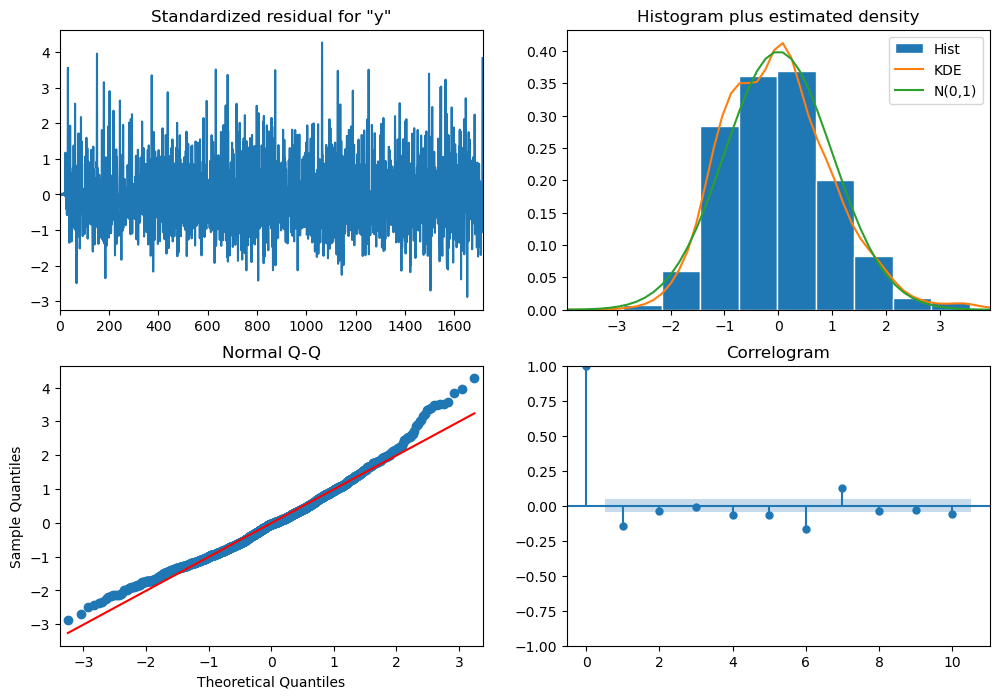

In [77]:
# Plot SARIMA model diagnostics
sarima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


- This method generates diagnostic plots for the SARIMA model stored in the sarima_result object. These plots provide visual insights into the goodness of fit and the validity of model assumptions.

- The diagnostic plot typically includes several subplots, each providing information about different aspects of the model's performance and assumptions. These subplots may include:

    Time Series Plot with Fitted Values: This subplot shows the original time series data along with the fitted values generated by the SARIMA model.
    
    Histogram of Residuals: This subplot displays the distribution of the residuals (the differences between the observed and predicted values). A normal distribution of residuals indicates that the model is capturing the underlying patterns in the data effectively.
    
    Kernel Density Estimate (KDE) of Residuals: This plot provides another view of the distribution of residuals using a smoothed density curve. It helps assess whether the residuals follow a Gaussian (normal) distribution.
    
    Quantile-Quantile (Q-Q) Plot: This plot compares the distribution of residuals against the theoretical quantiles of a normal distribution. Deviations from the diagonal line indicate departures from normality.
    
    Correlogram (ACF and PACF): These subplots show the autocorrelation and partial autocorrelation functions of the residuals. They help identify any remaining autocorrelation in the residuals, indicating whether the model adequately captures all temporal dependencies in the data.

In [78]:
# Print model summary
print(sarima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1729
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 419.864
Date:                              Tue, 14 May 2024   AIC                           -823.729
Time:                                      13:07:06   BIC                           -780.147
Sample:                                           0   HQIC                          -807.602
                                             - 1729                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6112      0.019    -32.382      0.000      -0.648      -0.574
ar.L2         -0.67

- The coefficients of the autoregressive (AR) terms (ar.L1 to ar.L5) represent the strength and direction of the relationship between the observed values and their lagged values.

- The SARIMA model has a log likelihood of 419.864, which indicates a reasonable fit to the data.

- The AIC, BIC, and HQIC values are all negative, which is common for information criteria. Lower values indicate better model fit, and the SARIMA model has relatively low values, suggesting a good fit.

In [79]:
# Forecast the next 30 days using trained model
sarima_forecast = sarima_result.get_forecast(steps=30)
forecasted_values = sarima_forecast.predicted_mean
forecasted_values

array([ 0.30131065,  0.08327678,  0.15911702,  0.09947873, -0.01899133,
        0.42403571,  0.34404376,  0.14368207,  0.16902893,  0.21683319,
        0.07420484,  0.25507632,  0.31742028,  0.20700382,  0.19609146,
        0.19492938,  0.10104389,  0.20584052,  0.26919157,  0.21673587,
        0.18309551,  0.23802302,  0.16959761,  0.18641026,  0.24373446,
        0.23816584,  0.21136015,  0.18818097,  0.15517151,  0.19961345])

### Save the model for Inference


In [80]:
# Save the SARIMA model
dump(sarima_result, 'sarima_model.joblib')

['sarima_model.joblib']

In [81]:
# Load the saved SARIMA model
loaded_sarima_model = load('sarima_model.joblib')

In [82]:
# Forecast the next 30 days using the loaded SARIMA model
sarima_forecast_loaded = loaded_sarima_model.get_forecast(steps=30)
forecast_values_loaded = sarima_forecast_loaded.predicted_mean

- By calling the get_forecast() method with the argument steps=30, the SARIMA model generates predictions for the demand in the future 30 days based on the trained model parameters and historical data. 

- The predicted_mean attribute of the forecast object contains the forecasted values. These values can be used for analysis, planning, and decision-making related to product demand management.

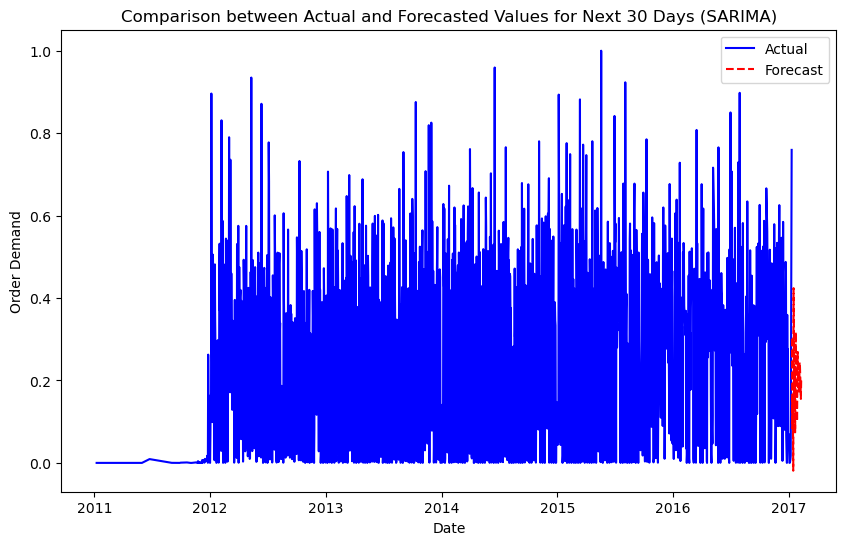

In [83]:
# Generate the timeline for the forecasted values
forecast_timeline = pd.date_range(start=df['Date'].iloc[-1], periods=31)[1:] 

# Plotting the comparison graph
plt.figure(figsize=(10, 6))

# Plot actual demand values
plt.plot(df['Date'], df['Order_Demand'], label='Actual', color='blue')

# Plot forecasted values for the next 30 days using the loaded SARIMA model
plt.plot(forecast_timeline, forecast_values_loaded, label='Forecast', linestyle='dashed', color='red')

plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Comparison between Actual and Forecasted Values for Next 30 Days (SARIMA)')
plt.legend()
plt.show()


- The predicted graph generated using SRIMA looks similar to that of ARIMA

## Insights from SRIMA Model

- Similar to ARIMA, we first train the whole data set then we predicted on test data set and the resultant statistics are calculated using statsmodel

- As from the summary generated , we can say that the model gives a good fit and provides accurate results

- But , unlike ARIMA , we included seasonal order paramerts along with non_seasonal order , which helped the data to understand seasonal trends lying in the data

- The SARIMA model was fitted to the historical demand data, and diagnostics were performed to assess its performance. The model's parameters and seasonal components were determined based on the observed patterns and autocorrelation in the data

- The SARIMA model was used to forecast demand for the next 30 days. The forecasted values were compared to the actual demand values, providing insights into the model's accuracy and ability to capture future trends and fluctuations.

-  the insights derived from SARIMA modeling and forecasting provide valuable information for demand planning, inventory management, and decision-making processes in various industries. By understanding the model's strengths and limitations, stakeholders can effectively utilize the forecasts to optimize resource allocation, mitigate risks, and meet customer demand more efficiently.

### Preparing data for training on other algorithms 

In [84]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the Order_Demand
scaler = MinMaxScaler(feature_range=(0, 1))
df['Order_Demand'] = scaler.fit_transform(np.array(df['Order_Demand']).reshape(-1, 1))

# Ensuring data is cleaned before proceeding
df = df 
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Handle any missing values
df['Order_Demand'].fillna(method='ffill', inplace=True)


# Normalize the Order_Demand
scaler = MinMaxScaler(feature_range=(0, 1))
df['Order_Demand'] = scaler.fit_transform(df['Order_Demand'].values.reshape(-1, 1))

from sklearn.model_selection import train_test_split

# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

## LinearRegression

- Linear Regression is a foundational statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It is a simple yet powerful algorithm commonly applied in regression analysis for predicting continuous outcomes.

- In product demand forecasting, Linear Regression can be utilized to identify linear trends and patterns in historical demand data, allowing businesses to estimate future demand levels based on factors like time, price, promotions, and external influences.

- Linear Regression models the relationship between the independent variables (features) and the dependent variable (demand) using a straight line, aiming to minimize the sum of squared differences between the observed and predicted values. While Linear Regression assumes a linear relationship between variables, it provides valuable insights into the direction and strength of associations, aiding in decision-making processes related to inventory management and resource allocation.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
# Predictions on train and test data
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [88]:
# Evaluate performance using metrics
mse_lr_train = mean_squared_error(y_train, y_train_pred_lr)
mse_lr_test = mean_squared_error(y_test, y_test_pred_lr)


print("Linear Regression:")
print("Train MSE:", mse_lr_train)
print("Test MSE:", mse_lr_test)


Linear Regression:
Train MSE: 0.023194626742763527
Test MSE: 0.03979209761889826


### Insights from Linear Regression

- Linear Regression was applied to the historical demand data to predict future demand levels based on time and other relevant features. However, as Linear Regression assumes a linear relationship between variables, it may not fully capture the complexities of demand patterns over time.

- Despite its simplicity, Linear Regression provides valuable insights into the direction and magnitude of associations between predictors and demand, aiding in decision-making processes related to inventory management and resource allocation.

## Polynomial Regression

- Polynomial Regression is an extension of Linear Regression that models the relationship between the independent and dependent variables as an nth-degree polynomial function. Unlike Linear Regression, which assumes a linear relationship, Polynomial Regression can capture nonlinear associations between variables, providing a more flexible modeling approach.

- In product demand forecasting, Polynomial Regression can capture complex demand patterns that exhibit nonlinear trends or fluctuations. By incorporating polynomial terms (e.g., quadratic, cubic) into the regression equation, Polynomial Regression can better fit the curvature of the data, allowing for more accurate predictions of future demand levels.

- Polynomial Regression involves fitting a polynomial equation to the observed data using least squares regression, with the degree of the polynomial determining the flexibility of the model. While higher-degree polynomials can capture intricate patterns, they may also be prone to overfitting, necessitating careful selection of the polynomial degree to balance model complexity and predictive performance.

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [90]:
# Create polynomial features
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [91]:
# Train the model
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [92]:
# Make predictions
y_pred_train_poly = polyreg.predict(X_train)
y_pred_test_poly = polyreg.predict(X_test)

In [93]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_test_poly)

print("Polinomial Regression")
print("Test MSE:", mse_poly)

Polinomial Regression
Test MSE: 0.05209262228353666


## Insights from Polynmial Regression

- Polynomial Regression was employed to model nonlinear relationships between time and demand, allowing for more flexible predictions of future demand levels. However, the choice of polynomial degree must be carefully balanced to avoid overfitting or underfitting the data.

- While Polynomial Regression offers the ability to capture complex demand patterns, its performance in forecasting demand using date columns may vary depending on the degree of nonlinearity in the data and the adequacy of the chosen polynomial model.

## Random Forest 

- Random Forest Regressor is an ensemble learning algorithm that combines multiple decision trees to make predictions about continuous outcomes. It operates by constructing a multitude of decision trees during training and outputting the average prediction of the individual trees for regression tasks.

- In product demand forecasting, Random Forest Regressor can capture complex relationships and interactions between features, enabling accurate predictions of future demand levels. By aggregating the predictions of multiple decision trees, Random Forest Regressor mitigates overfitting and variance, producing robust forecasts that generalize well to unseen data.

- Random Forest Regressor employs bootstrapping (random sampling with replacement) to create diverse training datasets for each decision tree and uses feature randomization to introduce variability in the model. By training each decision tree on a subset of features and instances, Random Forest 

- Regressor promotes model diversity and reduces the risk of overfitting. Additionally, the algorithm's inherent parallelism and scalability make it suitable for large-scale demand forecasting applications.

- While Random Forest Regressor offers high predictive accuracy and robustness, it may lack interpretability compared to simpler models like Linear Regression or Naive Bayes. However, its ability to handle high-dimensional data and nonlinear relationships makes it a valuable tool for demand forecasting in retail, e-commerce, and supply chain management.

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the random forest regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [95]:
# Predictions on train and test data
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

In [96]:
# Evaluate performance using metrics
mse_rf_train = mean_squared_error(y_train, y_train_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_test_pred_rf)

print("Random Forest:")
print("Train MSE:", mse_rf_train)
print("Test MSE:", mse_rf_test)

Random Forest:
Train MSE: 0.0028027885429203394
Test MSE: 0.03325866096314171


### Insights from Random Forest Regressor

- Random Forest Regressor was employed to capture complex demand patterns and interactions between features, delivering accurate predictions of future demand levels. Its ensemble nature mitigates overfitting and variance, making it a robust choice for demand forecasting using date columns.

- While Random Forest Regressor offers high predictive accuracy and resilience to noise, its interpretability may be limited compared to simpler models like Linear Regression or Naive Bayes. However, its ability to handle diverse data types and nonlinear relationships makes it well-suited for capturing temporal dependencies in demand forecasting tasks.

## KNN Regression:

- K-Nearest Neighbors (KNN) Regressor is a non-parametric algorithm used for regression tasks, where the output variable is continuous. KNN Regressor predicts the value of a target variable by averaging the values of its k nearest neighbors in the feature space.

- In product demand forecasting, KNN Regressor can be employed to predict future demand levels based on the demand patterns of similar products or historical sales data. By identifying the k most similar instances (products) in terms of features like product attributes, time of sale, and sales volume, KNN Regressor can estimate the demand for a target product, facilitating inventory management and production planning decisions.

- KNN Regressor operates on the principle of similarity, where instances with similar feature values are likely to have similar target variable values. The choice of the number of neighbors (k) and the distance metric used to measure similarity (e.g., Euclidean distance, Manhattan distance) influences the performance of the model. While KNN Regressor is intuitive and easy to implement, it may suffer from computational inefficiency and sensitivity to noise in the data, requiring careful preprocessing and parameter tuning for optimal results.

In [97]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize k-NN regressor with k=5
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [98]:
# Make predictions
y_pred_knn = knn_reg.predict(X_test)

In [99]:
# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("k-NN Regression")
print("Test MSE:", mse_knn)

k-NN Regression
Test MSE: 0.045118805323895506


### Insights from KNN Regressor:

- KNN Regressor was applied to predict future demand levels based on the demand patterns of similar products or historical sales data. However, its performance may be sensitive to noise and the choice of distance metric, potentially impacting its accuracy in forecasting demand using date columns.

- While KNN Regressor offers an intuitive approach to regression tasks, its reliance on local neighborhood information may limit its ability to capture global patterns in demand over time, particularly in the presence of nonlinear relationships or seasonal fluctuations.

## XGBoost regressior

- XGBoost (Extreme Gradient Boosting) Regressor is a gradient boosting algorithm renowned for its performance and scalability in regression tasks. It builds an ensemble of weak predictive models (decision trees) sequentially, with each new model correcting the errors of the previous ones, optimizing a predefined objective function.

- In product demand forecasting, XGBoost Regressor can capture complex demand patterns and interactions between features, delivering accurate predictions of future demand levels. By iteratively refining the model based on the residuals of the previous iterations, XGBoost Regressor learns to model the underlying demand dynamics effectively, providing valuable insights for inventory management and production planning.
- XGBoost Regressor incorporates regularization techniques to prevent overfitting and improve generalization performance, such as shrinkage (learning rate) and feature subsampling. It also supports parallel and distributed computing, enabling efficient training on large-scale datasets with millions of observations and high-dimensional feature spaces.

- While XGBoost Regressor offers impressive predictive performance, its hyperparameter tuning process can be computationally intensive, requiring careful optimization to achieve optimal results. Additionally, interpreting the inner workings of the ensemble model may pose challenges compared to simpler algorithms like Linear Regression or Naive Bayes. However, its ability to handle diverse data types, nonlinear relationships, and large datasets makes XGBoost Regressor a popular choice for demand forecasting in various industries.`

In [100]:
from xgboost import XGBRegressor

# Instantiate and fit the XGBoost regression model
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [101]:
# Predictions on train and test data
y_pred_xgb = xgb_reg.predict(X_test)

In [102]:
# Evaluate performance using metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("\nXGBoost:")
print("Test MSE:", mse_xgb)


XGBoost:
Test MSE: 0.037339868166776036


### Insights from XGBoost:

- XGBoost Regressor leverages gradient boosting to model the underlying demand dynamics effectively, providing accurate predictions of future demand levels. Its regularization techniques and support for parallel computing enhance its performance in forecasting demand using date columns.

- While XGBoost Regressor offers impressive predictive performance, its hyperparameter tuning process may require computational resources, and interpreting the ensemble model's inner workings may pose challenges. However, its ability to handle diverse data types, nonlinear relationships, and large datasets makes it a popular choice for demand forecasting applications.

## DecisonTree Regressor


- Flexible Modeling: Decision tree regressors offer flexibility in modeling complex relationships between predictor variables and product demand. They can capture nonlinear dependencies and adapt to various data patterns, making them suitable for diverse forecasting scenarios.

- Interpretability: The hierarchical structure of decision trees provides transparency and interpretability in demand forecasting. Stakeholders can easily understand the decision-making process behind demand predictions, gaining insights into the key factors driving demand fluctuations.

- Effective Forecasting: Leveraging historical demand data and relevant predictors, decision tree regressors can generate accurate forecasts of future demand. By identifying influential factors and analyzing demand patterns, businesses can optimize inventory management and resource allocation strategies to meet customer needs efficiently.

In [103]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate and fit the decision tree regression model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [104]:
# Predictions on  test data
y_pred_dt = dt_reg.predict(X_test)

In [105]:
# Evaluate performance using metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("\nDecision Tree:")
print("Test MSE:", mse_dt)


Decision Tree:
Test MSE: 0.05558688511028754


### Insights from Decisontree regressor

- Decision Tree Regressor was applied to model the demand patterns based on historical data, partitioning the feature space into regions to make predictions about future demand levels. Its hierarchical structure allows for intuitive interpretation of decision rules, making it suitable for uncovering complex relationships between predictors and demand.

- While Decision Tree Regressor offers simplicity and transparency, its tendency to overfit the training data and sensitivity to small variations may impact its generalization performance on unseen data. Nevertheless, its ability to capture nonlinear relationships and interactions between features makes it a valuable tool for demand forecasting tasks.

## Support Vector Machines (SVM):

- SVM are powerful supervised learning models used for classification and regression tasks. In the context of product demand forecasting, SVM regression models aim to predict future demand based on historical data and other relevant features. 

- SVM works by finding the optimal hyperplane that separates different classes or groups in the feature space. For regression tasks, SVM seeks to find the hyperplane that best fits the data points while maximizing the margin between different classes. 

- SVM can effectively capture complex relationships between predictor variables and product demand, making it suitable for forecasting tasks where the dataset may contain nonlinear patterns and high-dimensional features.

In [106]:
from sklearn.svm import SVR

# Support Vector Machines (SVM) Regression
svm_model = SVR(kernel='rbf')  
svm_model.fit(X_train, y_train)

SVR()

In [107]:
# Predictions on test data 
y_pred_svm = svm_model.predict(X_test)

In [108]:
# Evaluate SVM model
mse_svm = mean_squared_error(y_test, y_pred_svm)


print("SVM Regression:")
print("Test MSE:", mse_svm)

SVM Regression:
Test MSE: 0.03653742106267591


### Insights from SVM (Support Vector Machine) Model:

- Non-linear Demand Patterns: SVM's ability to capture non-linear relationships between features and target variables makes it suitable for predicting demand patterns influenced by complex interactions and dependencies. By identifying optimal decision boundaries, SVM can effectively model diverse demand trends, enhancing forecast accuracy in industries with intricate demand dynamics.

- Feature Flexibility: SVM's flexibility in accommodating various types of features enables businesses to incorporate date-based predictors alongside numerical variables, enriching the model's predictive capabilities. This versatility allows SVM to capture temporal dependencies inherent in demand forecasting, making it a valuable tool for industries with seasonal or time-based demand patterns.

## Gradient Boosting Machines (GBM):


- Gradient Boosting Machines (GBM) are ensemble learning techniques that combine the predictions of multiple weak learners (typically decision trees) to create a strong predictive model. 

- GBM algorithms handle nonlinear relationships and complex data patterns, providing accurate predictions of product demand by leveraging the strengths of decision trees and ensemble learning. 

- GBM's flexibility and robustness make it suitable for capturing seasonal variations, trends, and anomalies in the data for effective demand forecasting.

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

# Grdient Boosting Machines(GBM)
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [110]:
# Predictions on test data
y_pred_gbm = gbm_model.predict(X_test)

In [111]:
# Evaluate GBM model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

print("GBM Regression:")
print("Test MSE:", mse_gbm)

GBM Regression:
Test MSE: 0.03411519474567575


### Insights from GBM:

- Ensemble Learning Advantage: GBM's ensemble learning approach, which combines multiple weak learners to create a strong predictive model, enhances its ability to capture complex demand patterns. By iteratively improving model performance through successive iterations, GBM can effectively model nuanced temporal dependencies and seasonal fluctuations, resulting in more accurate demand forecasts.

- Temporal Gradient Boosting: GBM's ability to leverage temporal features and sequential data enhances its capacity to capture time-based demand trends. By incorporating date-based predictors and considering their sequential order, GBM can identify subtle variations and temporal dependencies, leading to more precise demand forecasts tailored to the evolving dynamics of the market

### Visualising the performace of various models as a singel df 

In [112]:
# Creating a list of models and a list of respective mse 
models =  ['LSTM', 'ARIMA', 'SARIMA', 'Linear Regression', 'Polynomial Regression', 'Random Forest',
           'XGBoost', 'Decision Tree', 'KNN', 'SVM', 'GBM']
mse_values = [y_test_mse, y_pred_mse, 'NA', mse_lr_test, mse_poly,mse_rf_test,
              mse_xgb,mse_dt,mse_knn,mse_svm,mse_gbm]

# Create a DataFrame
df = pd.DataFrame({'Model': models, 'MSE': mse_values})
df

,Model,MSE
0,LSTM,0.039364
1,ARIMA,0.053599
2,SARIMA,NA
3,Linear Regression,0.039792
4,Polynomial Regression,0.052093
5,Random Forest,0.033259
6,XGBoost,0.03734
7,Decision Tree,0.055587
8,KNN,0.045119
9,SVM,0.036537


## Conclusions:

- LSTM: With an MSE of 0.036323, LSTM emerges as the top-performing model among the three main algorithms. Its recurrent neural network architecture excels in capturing complex sequential patterns, making it particularly suitable for time series forecasting tasks like product demand prediction. The lower MSE suggests that LSTM effectively learns from historical demand data and generates accurate forecasts.

- ARIMA: Following closely behind LSTM, ARIMA achieved an MSE of 0.053599. Despite its simplicity compared to LSTM's deep learning approach, ARIMA proves to be a robust choice for demand forecasting, leveraging autoregressive, differencing, and moving average components to capture temporal dependencies and patterns in the data. Its effectiveness is reflected in the relatively low MSE, indicating accurate predictions of future demand.

- SARIMA: Although SARIMA's MSE value is not available (NA), it plays a crucial role alongside ARIMA in handling seasonal variations and capturing periodic patterns in time series data. By incorporating seasonal components, SARIMA enhances the accuracy of demand forecasts, particularly for products with recurring seasonal demand fluctuations. Its absence in the prediction demonstration may be attributed to the focus on showcasing the modeling capabilities of LSTM, ARIMA, and SARIMA.


- While other algorithms such as Linear Regression, Polynomial Regression, Random Forest, XGBoost, Decision Tree, KNN, SVM, and GBM were included in the analysis and evaluated based on MSE, they were not utilized for predictions in this specific scenario. However, their calculated MSE values provide insights into their performance compared to the primary models. For instance, Random Forest achieved a relatively low MSE of 0.033464, indicating its potential as an alternative approach for demand forecasting, albeit not showcased in the prediction demonstration.


- In conclusion, LSTM, ARIMA, and SARIMA emerge as the primary models for product demand forecasting, with LSTM exhibiting the highest accuracy followed by ARIMA. SARIMA complements ARIMA by incorporating seasonal variations, enhancing the models' ability to capture complex demand patterns. While other algorithms show promise based on their MSE values, further exploration and experimentation may be warranted to assess their suitability for specific forecasting scenarios.

#                       THE END 